<a href="https://colab.research.google.com/github/1wikii/kmeans-clustering-in-customer-shop-data/blob/main/KMeans_Clustering_in_Customer_Shop_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering in Customer Shop Data
---

### Nama Anggota Kelompok
```
121140044   Ahmad Dwiky Zerro Dixxon
121140067   Daris Fikri Zhalifunnas
121140098   Benedictus Budhi Dharmawan
```

## Tujuan

> * Melakukan clustering atau pengelompokkan data-data yang memiliki prilaku mirip pada konteks dataset _Customer Shop Data_ untuk dicari korealasi antara jam Pemasukan tahunan ($) dengan Pengeluaran

# Pengenalan KMeans Clustering

>Algoritma Unsupervised Learning umumnya dibagi menjadi dua tipe: Supervised learning dan Unsupervised learning. Namun, sebagian besar algoritma diklasifikasikan sebagai Supervised learning dan Unsupervised learning. Perbedaan di antara keduanya disebabkan oleh keberadaan variabel target. Tidak ada variabel target dalam pembelajaran tanpa pengawasan. Dataset hanya berisi variabel input yang menggambarkan data. Ini dikenal sebagai Unsupervised learning.

-
>Algoritma pembelajaran tanpa pengawasan yang paling sering digunakan adalah K-Means clustering. Ini digunakan ketika kita memiliki data tanpa label, yaitu data yang tidak memiliki kategori atau kelompok yang jelas. Teknik ini menggunakan metode yang sederhana atau dasar untuk mengelompokkan suatu set data dengan jumlah cluster yang telah ditentukan. Berdasarkan atribut yang diberikan, algoritma K-Means secara iteratif menetapkan setiap titik data ke salah satu dari K kelompok. Pengelompokan titik data didasarkan pada kemiripan fitur.

### Import Library
>**numpy**
>> Library yang menyediakan operasi linear algebra yang akan dipakai pada kali ini


>**pandas**
>> Library yang menyediakan tentang fungsional untuk pemrosesan data


>**matplotlib.pyplot**
>> Library yang menyediakan fungsi untuk menampilkan data dalam bentuk visualisasi


>**seaborn**
>> Library yang menyediakan fungsi untuk menampilkan data dalam bentuk visualisasi juga tetapi memiliki tampilan yang lebih menarik

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings
warnings.filterwarnings("ignore")

### Import Dataset
>Membaca dataset dari github menggunakan salah satu fungsi modul pandas


>**pandas.read_csv**

In [27]:
data = "https://raw.githubusercontent.com/1wikii/kmeans-clustering-in-customer-shop-data/main/Shop_Customer_Data.csv"

df = pd.read_csv(data)

## Menampilkan Sample Dataset
>Menggunakan fungsi **head** bernilai 10 untuk menampilkan 10 data pertama pada row dataset

In [28]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


### Pemilihan Kolom yang dipakai
>Hanya memilih kolom _Income_ dan _Spending_ agar mempermudah dalam pemilihan fitur

In [29]:
df = df[['Annual Income ($)','Spending Score (1-100)']]

### Bentuk _dataframe_
>Menampilkan banyak row data dan kolom data

In [30]:
df.shape

(2000, 2)

### Informasi
>Menampilkan informasi tentang _dataframe_ untuk melihat apakah ada nilai null dalam row data

In [31]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income ($)       2000 non-null   int64
 1   Spending Score (1-100)  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


## Memilih Fitur untuk Model
>Pada konteks dataset _Customer Shop Data_ memilih kolom _Income_ dan _Spending_ saja yang akan dijadikan sebagai fitur


>Pada dataset ini tidak ada label sama sekali dalam pemilihan fitur


>Alasan memilih _Income_ dan _Spending_ sebagai fitur dikarenakan kedua aspek tersebut sangat kuat berkaitan yang akan menentukan prilaku customer/pelanggan sehingga dapat dijadikam sebagai fitur untuk menjadi tolak ukur

In [32]:
X= df.iloc[:, [0,1]].values

### Membuat Model
>Menggunakan algoritma KMeans untuk menentukan jumlah cluster maximal

>Menggunakan KMeans++ dengan metode siku untuk menentukan nilai K pada KMeans

>Menggunakan metode siku untuk menghitung KMeans++

>Menggunakan asumsi bahwa jumlah cluster maximal yang akan tercipta adalah 10

>Asumsi jumlah cluster maximal diatas dapat diprediksi dengan melakukan perataan

In [33]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Visualisasi Metode Siku
>Menentukan nilai maximal dari K

### Mengidentifikasi Visualisasi Metode Siku untuk Nilai K
>Menentukan nilai maximal dari K dengan melihat lengkungan graph yang siginifikan yang ketika di zoom out akan terlihat seperti bentuk siku kita

>Hasil identifikasi ditemukan lengkungan berada pada **3**, jadi **K = 3**

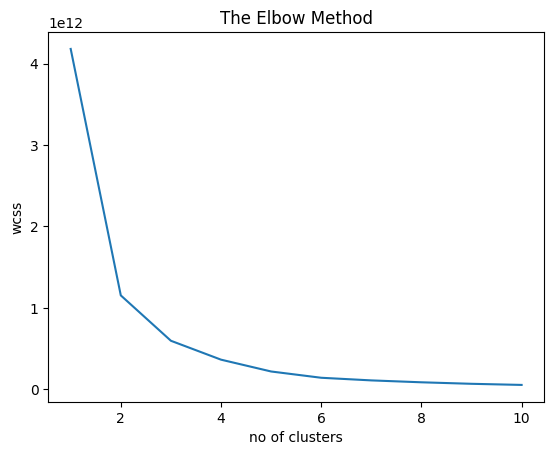

In [34]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

### Membuat Final Model
>Isikan nilai maximal K dari sebelumnya ke _n_clusters_

>_y_kmeans_ merupakan final model


In [35]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

### Menampilkan semua Cluster
>Menggunakan **matplotlib.pyplot** untuk memvisualisasikan semua cluster yang ada

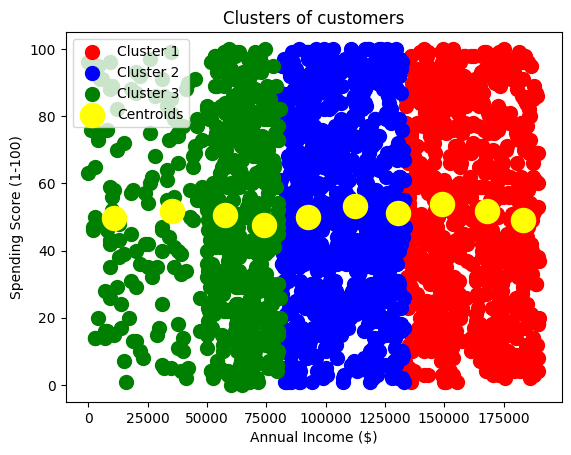

In [36]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Interpretasi Model
#Cluster 1 (Green Color) -> Penghasilan kecil dengan pengeluaran merata
#cluster 2 (Blue Color) -> Penghasilan sedang dengan pengeluaran merata
#cluster 3 (Red Color) -> Penghasilan tinggi dengan pengeluaran merata
